In [88]:
# imports
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np
from seaborn import pairplot
from seaborn import heatmap

# variables
DATA_PATHS = ["data/processed data/cleaned_test.csv", "data/processed data/cleaned_train.csv"]

PARTIES = ['DEMOCRAT', 'INDEPENDENT', 'REPUBLICAN']
COLORS = ['blue', 'green', 'red']

SEED = 42

In [89]:
# loading data
df_list = []
for path in DATA_PATHS:
    df_list.append(pd.read_csv(path))
df = pd.concat(df_list)
df_x = df.drop(['party'], axis='columns')
df_y = df['party']

                  |  PC 1   |  PC 2 
zip               | -0.0005 |  -1.0 
occupation        |   1.0   | -0.0005
donations_ytd     |  -0.0   |  -0.0 
donation          |  -0.0   |  -0.0 
PC 1 max: occupation = 1.0
PC 2 max: zip = -1.0


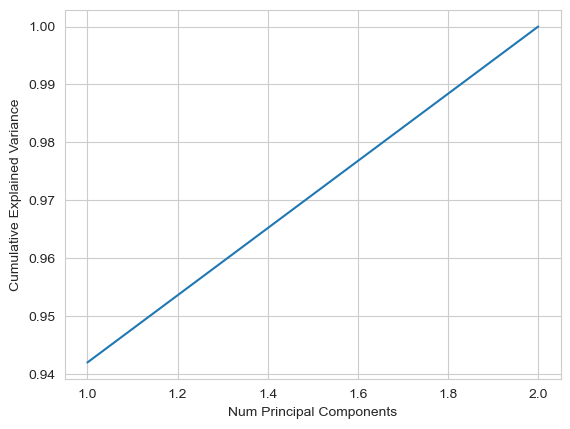

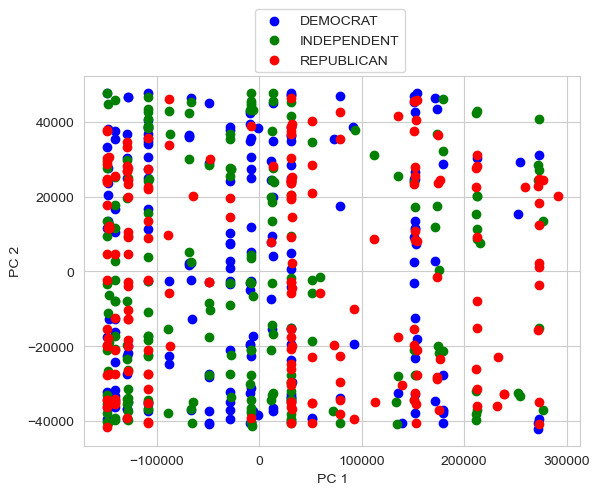

In [90]:
# PCA analysis
pca = PCA(n_components=2)
df_pca = pd.DataFrame(data=pca.fit_transform(df_x), index=df.index,  columns=['PC 1', 'PC 2'])

df_pca['party'] = df['party']

comp_1, comp_2 = pca.components_
feature_names = df_x.columns

print(f"{" " * 17} | {"PC 1": ^7} | {"PC 2": ^6}")
for feature, c1, c2 in zip(feature_names, comp_1, comp_2):
    print(f"{feature: <17} | {round(c1, 4): ^7} | {round(c2, 4): ^6}")

c1_max_ind = np.argmax(np.abs(comp_1))
c2_max_ind = np.argmax(np.abs(comp_2))
print(f"PC 1 max: {feature_names[c1_max_ind]} = {round(comp_1[c1_max_ind], 4)}")
print(f"PC 2 max: {feature_names[c2_max_ind]} = {round(comp_2[c2_max_ind], 4)}")

plt.figure()
plt.plot(range(1, 3), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Num Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# PCA scatterplot
sample_pca = df_pca.groupby('party').sample(n=200, random_state=SEED)

plt.figure()

handles = [plt.scatter([], [], color=color) for color in COLORS]
labels = PARTIES

for target in sample_pca['party'].unique():
    subset = sample_pca[sample_pca['party'] == target]
    plt.scatter(subset['PC 1'], subset['PC 2'], color = COLORS[PARTIES.index(target)])

plt.legend(handles, labels, bbox_to_anchor=(0.66, 1.2))
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

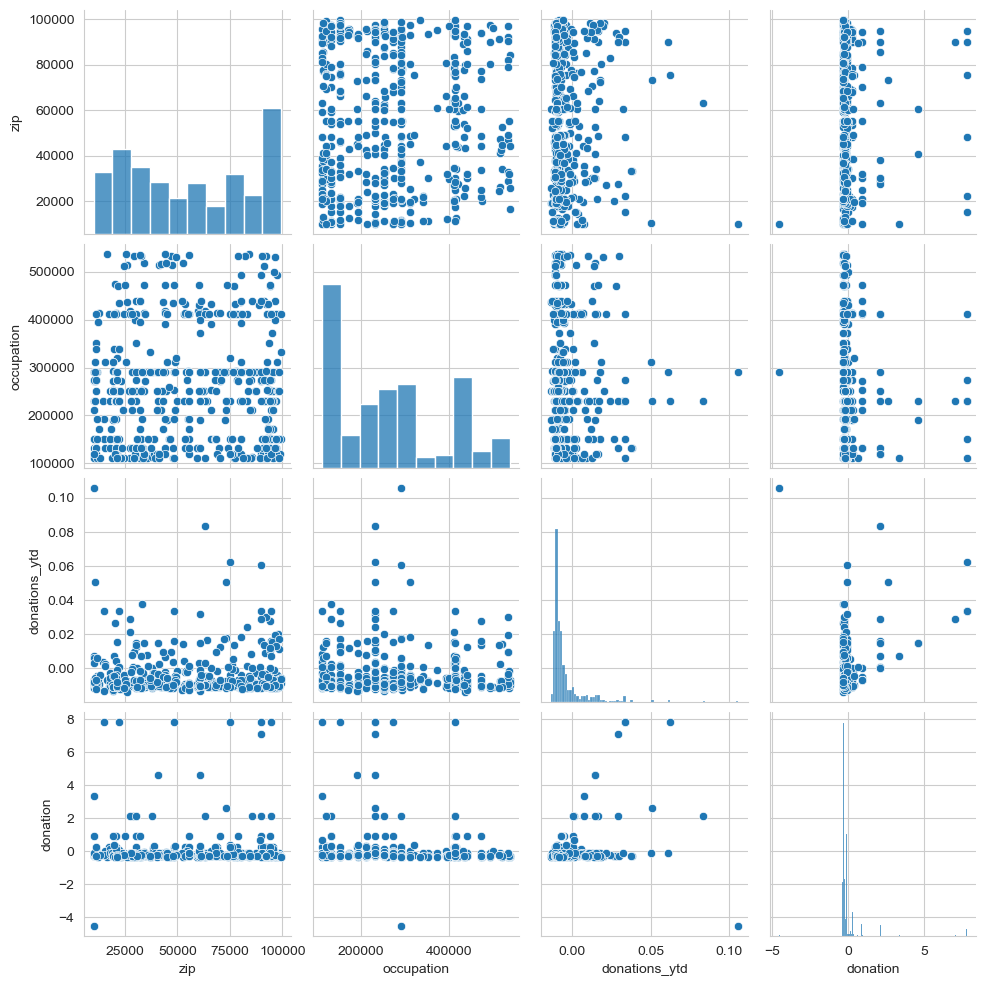

In [91]:
# pair plot
x = df_x.sample(n=500, random_state=SEED)
pairplot(x)

<Axes: >

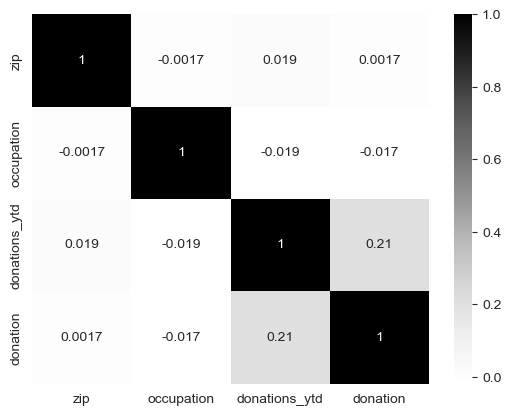

In [92]:
# heatmap
correlation_matrix = df_x.corr()
heatmap(correlation_matrix, annot=True, cmap="Greys")